# Mapping Julich/Brodmann to Desikan-Killiany parcelation

This notebook maps the neuron receptor distribution presented in Zilles & Palomero (2017) to the Desikan-Killiany parcellation. Zilles & Palomero (2017) examined 44 areas that were defined using Brodmann and JuelichBrain Atlases. 

Reference:
- Zilles, K., & Palomero-Gallagher, N. (2017). Multiple transmitter receptors in regions and layers of the human cerebral cortex. Frontiers in Neuroanatomy, 11, 78. https://doi.org/10.3389/fnana.2017.00078

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

Areas mapped by Rembrandt with their respective coordinates and regions.

In [2]:
data_regions = {
  "1": {
    "coord": [-55.2,-13.3,35.3],
    "region": "postcentral"
  },
  "2":{
    "coord": [-49.7,-21.3,30.3],
    "region": "postcentral"    
  },
  "3a,3b":{
    "coord": [-39.5,-8.9,33.1],
    "region": "postcentral"    
  },
  "4":{
    "coord":[-55.3,-4.5,28.3],
    "region":"precentral"
  },
  "5L": {
    "coord": [-20.4,-27.5,58.5],
    "region": "postcentral"
  },
  "5M": {
    "coord": [-2.7,-31.8,52.9],
    "region": "paracentral"
  },
  "6":{
    "coord": [-13.3,24.9,44.3],
    "region": "caudalmiddlefrontal"
  },
  "8":{
    "coord": [-23.1,22.7,29.5],
    "region":"superiorfrontal"
  },
  "9":{
    "coord": [-13.3,60.8,8.5],
    "region":"superiorfrontal"
  },
  "10L": {
    "coord": [-14,64.5,-29.6],
    "region": "frontalpole"
  },
  "10M":{
    "coord": [-1.1,56.2,-26.8],
    "region": "frontalpole"
  },
  "11":{
    "coord": [-0.7,23.7,-41.8],
    "region":"medialorbitofrontal"
  },
  "20":{
    "coord": [-59.6,-28.5,-40],
    "region": "inferiortemporal"
  },
  "21": {
    "coord": [-67.4,-14.7,-30.8],
    "region": "middletemporal"
  },
  "22": {
    "coord": [-63.5,-0.5,-20.9],
    "region": "superiortemporal"
  },
  "23":{
    "comment":"This is actually 23D, 23V is coming",
    "coord": [-1.1,-15.8,15.1],
    "region": "posteriorcingulate"
  },
  "24":{
    "coord":[-3.2,32.4,-11],
    "region": "caudalanteriorcingulate"
  },
  "31":{
    "coord": [-1.1,-25.6,24.6],
    "region": "posteriorcingulate"
  },
  "32":{
    "coord":[-0.4,38.2,-10.6],
    "region":"rostralanteriorcingulate"
  },
  "36":{
    "coord":[-37.6,-28.3,-43.6],
    "region":"fusiform"
  },
  "37B":{
    "coord":[-55,-56.8,-31.8],
    "region":"inferiortemporal"
  },
  "37M":{
    "coord":[-38,-44.5,-33.6],
    "region":"fusiform"
  },
  "37L": {
    "coord": [-64.3,-58.3,-17.8],
    "region": "inferiortemporal"
  },
  "38": {
    "coord": [-34.4,14.5,-51.1],
    "region": "temporalpole"
  },  
  "41": {
    "coord": [-46.7,-16.8,-2.8],
    "region": "transversetemporal"
  },
  "42": {
    "coord": [-57.7,-13.2,-3.2],
    "region": "superiortemporal",
    "comment": "deep into sulcus, lateral to 41"
  },
  "44": {
    "coord": [-58.6,18.8,-6.7],
    "region": "parsopercularis"
  },
  "45": {
    "coord": [-57.9,30.8,-18.5],
    "region": "parstriangularis"
  },
  "46": {
    "coord": [-43.3,52.5,-11.6],
    "region": "rostralmiddlefrontal"
  },
  "47": {
    "coord": [-50.9,30.6,-32.5],
    "region": "parsorbitalis"
  },
  "FG1":{
    "coord":[-26.6,-59.2,-21.5],
    "region":"fusiform"
  },
  "FG2":{
    "coord":[-40.6,-66.3,-24],
    "region":"fusiform"
  },
  "PFt": {
    "coord": [-65.6,-21,17],
    "region": "supramarginal"
  },
  "PFm": {
    "coord": [-53,-42.1,37.5],
    "region": "supramarginal"
  },
  "PGa": {
    "coord": [-42.5,-64.8,31.9],
    "region": "inferiorparietal"
  },
  "PGp": {
    "coord": [-33.3,-80.9,20.2],
    "region":  "inferiorparietal"
  },
  "V1":{
    "coord":[-6.9,-81.9,3.7],
    "region": "pericalcarine"
  },
  "V2d":{
    "coord":[-0.2,-82.3,12.7],
    "region":"cuneus"
  },
  "V2v":{
    "coord":[-0.2,-86.3,3.9],
    "region":"lingual"
  },
  "V3A":{
    "coord":[-5.4,-70.6,26.2],
    "region":"superiorparietal"
  },
  "V3d":{
    "coord":[-4.5,-81.3,24],
    "region":"superiorparietal"
  },
  "V3v":{
    "coord":[-21.4,-76.7,-21.1],
    "region":"lingual"
  },
  "V4v": {
    "coord": [-36.1,-88,-20.7],
    "region": "lateraloccipital"
  }
}

In [3]:
# Data from dict to Pandas Dataframe:
julichbrain2DK = pd.DataFrame.from_dict(data_regions, orient='index')

# Drop coordinates and remark columns:
julichbrain2DK = julichbrain2DK.drop(['coord', 'comment'], axis=1)

# Convert index labels to a column. Then, rename it accordingly and set it as the new index.
julichbrain2DK = julichbrain2DK.reset_index().rename(columns={'region': 'dk_parcellation', 'index': 'julich_brain'}).\
    set_index(['dk_parcellation','julich_brain'])

## Julich/Brodmann areas contained in DK parcellation

In [4]:
julichbrain2DK.sort_index(level=0)

Empty DataFrame
Columns: []
Index: [(caudalanteriorcingulate, 24), (caudalmiddlefrontal, 6), (cuneus, V2d), (frontalpole, 10L), (frontalpole, 10M), (fusiform, 36), (fusiform, 37M), (fusiform, FG1), (fusiform, FG2), (inferiorparietal, PGa), (inferiorparietal, PGp), (inferiortemporal, 20), (inferiortemporal, 37B), (inferiortemporal, 37L), (lateraloccipital, V4v), (lingual, V2v), (lingual, V3v), (medialorbitofrontal, 11), (middletemporal, 21), (paracentral, 5M), (parsopercularis, 44), (parsorbitalis, 47), (parstriangularis, 45), (pericalcarine, V1), (postcentral, 1), (postcentral, 2), (postcentral, 3a,3b), (postcentral, 5L), (posteriorcingulate, 23), (posteriorcingulate, 31), (precentral, 4), (rostralanteriorcingulate, 32), (rostralmiddlefrontal, 46), (superiorfrontal, 8), (superiorfrontal, 9), (superiorparietal, V3A), (superiorparietal, V3d), (superiortemporal, 22), (superiortemporal, 42), (supramarginal, PFm), (supramarginal, PFt), (temporalpole, 38), (transversetemporal, 41)]

DK areas:

In [5]:
DK_areas = ['bankssts',
 'caudalanteriorcingulate',
 'caudalmiddlefrontal',
 'cuneus',
 'entorhinal',
 'fusiform',
 'inferiorparietal',
 'inferiortemporal',
 'isthmuscingulate',
 'lateraloccipital',
 'lateralorbitofrontal',
 'lingual',
 'medialorbitofrontal',
 'middletemporal',
 'parahippocampal',
 'paracentral',
 'parsopercularis',
 'parsorbitalis',
 'parstriangularis',
 'pericalcarine',
 'postcentral',
 'posteriorcingulate',
 'precentral',
 'precuneus',
 'rostralanteriorcingulate',
 'rostralmiddlefrontal',
 'superiorfrontal',
 'superiorparietal',
 'superiortemporal',
 'supramarginal',
 'frontalpole',
 'temporalpole',
 'transversetemporal',
 'insula']

## DK missing areas when mapping from Julich/Brodmann:

In [6]:
# Checking how many DK areas were not accounted
grouped_DK = julichbrain2DK.groupby(['dk_parcellation']).groups
DK_not_included = []
DK_included = []
for value in DK_areas:
    if value in grouped_DK.keys():
        DK_included.append(value)
    else:
        DK_not_included.append(value)

In [7]:
DK_not_included

['bankssts',
 'entorhinal',
 'isthmuscingulate',
 'lateralorbitofrontal',
 'parahippocampal',
 'precuneus',
 'insula']

## Neuron receptor distribution from Zilles & Palomero (2017):

In [8]:
receptor_list = ['AMPA','NMDA']
data_receptors = pd.read_excel('receptor-distribution-multitabs.xlsx', sheet_name=receptor_list, index_col=0, header=0)

# layer depths
layer = ['supragranular', 'granular', 'infragranular']

Extracting AMPA and NMDA distributions:

In [9]:
data_receptors['AMPA'].index = data_receptors['AMPA'].index.astype(str) # it garantees that all labels are strings
ampa_dist = julichbrain2DK.join(data_receptors['AMPA'][layer], on='julich_brain')

data_receptors['NMDA'].index = data_receptors['NMDA'].index.astype(str) # it garantees that all labels are strings
nmda_dist = julichbrain2DK.join(data_receptors['NMDA'][layer], on='julich_brain')

### Averaging across Julich/Brodmann areas contained into DK

Here we can check how neuron receptor distribution values for multiple areas contained in DK vary by averaging and calculating the standard deviation.

In [10]:
ampa_mean = ampa_dist.groupby(level=0).mean().round(2)
ampa_std = ampa_dist.groupby(level=0).std().round(2)

# printing all values together
ampa_dist.groupby(level=0).agg(['mean','std']).round(2)

supragranular        granular        infragranular  \
                                  mean    std     mean    std          mean   
dk_parcellation                                                               
caudalanteriorcingulate         546.00    NaN      NaN    NaN        467.00   
caudalmiddlefrontal             336.00    NaN   290.00    NaN        272.00   
cuneus                          569.00    NaN   373.00    NaN        333.00   
frontalpole                     704.50  13.44   673.00  52.33        669.00   
fusiform                        696.25  84.42   558.50  72.69        525.75   
inferiorparietal                432.50  26.16   363.50  38.89        359.00   
inferiortemporal                590.00  30.79   499.67  64.27        484.33   
lateraloccipital                507.00    NaN   376.00    NaN        271.00   
lingual                         608.00   4.24   415.00   1.41        341.50   
medialorbitofrontal             811.00    NaN   754.00    NaN        764.00   
middletemporal                  669.00    NaN   590.00    NaN        554.00   
paracentral                     413.00    NaN   337.00    NaN        338.00   
parsopercularis                 602.00    NaN   487.00    NaN        468.00   
parsorbitalis                   718.00    NaN   640.00    NaN        651.00   
parstriangularis                524.00    NaN   415.00    NaN        393.00   
pericalcarine                   606.00    NaN   406.00    NaN        276.00   
postcentral                     490.00  76.92   368.33  48.52        344.00   
posteriorcingulate              423.00  22.63   339.50  30.41        327.00   
precentral                      404.00    NaN   272.00    NaN        224.00   
rostralanteriorcingulate        410.00    NaN   372.00    NaN        346.00   
rostralmiddlefrontal            693.00    NaN   595.00    NaN        585.00   
superiorfrontal                 682.50  10.61   640.00  12.73        605.50   
superiorparietal                611.00  39.60   397.00  24.04        374.50   
superiortemporal                575.50  10.61   431.50  17.68        401.50   
supramarginal                   546.00  21.21   458.50  14.85        447.50   
temporalpole                    735.00    NaN   721.00    NaN        687.00   
transversetemporal              561.00    NaN   368.00    NaN        367.00   

                                 
                            std  
dk_parcellation                  
caudalanteriorcingulate     NaN  
caudalmiddlefrontal         NaN  
cuneus                      NaN  
frontalpole               65.05  
fusiform                  66.29  
inferiorparietal          35.36  
inferiortemporal          49.80  
lateraloccipital            NaN  
lingual                   12.02  
medialorbitofrontal         NaN  
middletemporal              NaN  
paracentral                 NaN  
parsopercularis             NaN  
parsorbitalis               NaN  
parstriangularis            NaN  
pericalcarine               NaN  
postcentral               27.40  
posteriorcingulate        38.18  
precentral                  NaN  
rostralanteriorcingulate    NaN  
rostralmiddlefrontal        NaN  
superiorfrontal            3.54  
superiorparietal          71.42  
superiortemporal           9.19  
supramarginal             13.44  
temporalpole                NaN  
transversetemporal          NaN

/home/shimoura/miniconda3/envs/nest3-tc-S1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)


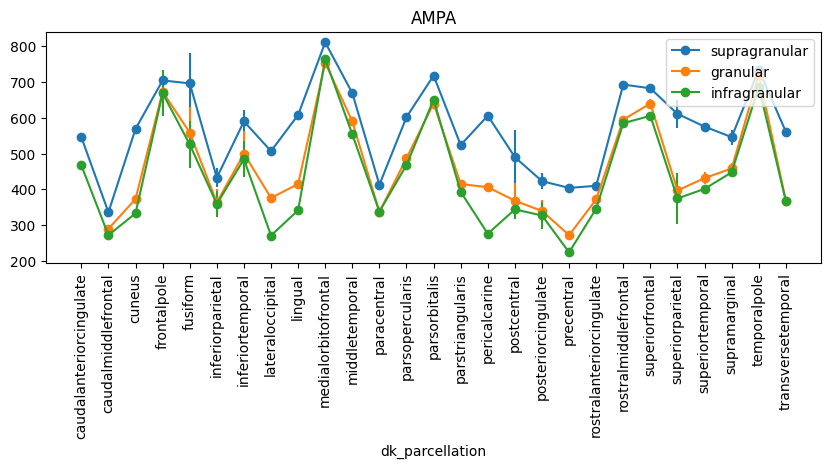

In [11]:
ax = ampa_mean.plot(marker='o', yerr=ampa_std, figsize=[10,3], title='AMPA')
ax.set_xticks(range(len(ampa_mean.index)))
ax.set_xticklabels(ampa_mean.index, rotation=90);

In [12]:
nmda_mean = nmda_dist.groupby(level=0).mean().round(2)
nmda_std = nmda_dist.groupby(level=0).std().round(2)

# printing all values together
nmda_dist.groupby(level=0).agg(['mean','std']).round(2)

supragranular         granular         infragranular  \
                                  mean     std     mean     std          mean   
dk_parcellation                                                                 
caudalanteriorcingulate        1622.00     NaN      NaN     NaN       1329.00   
caudalmiddlefrontal             873.00     NaN    789.0     NaN        633.00   
cuneus                         1785.00     NaN   1500.0     NaN       1061.00   
frontalpole                    1144.50   60.10   1021.5   78.49        897.50   
fusiform                       1562.75  105.48   1383.5   37.35       1101.25   
inferiorparietal               1356.50   21.92   1152.5   33.23        964.50   
inferiortemporal               1436.67   57.73   1254.0   17.35       1048.67   
lateraloccipital               1545.00     NaN   1479.0     NaN        945.00   
lingual                        1771.50   17.68   1565.0   59.40       1088.00   
medialorbitofrontal            1341.00     NaN   1235.0     NaN       1067.00   
middletemporal                 1453.00     NaN   1272.0     NaN       1128.00   
paracentral                    1113.00     NaN    948.0     NaN        811.00   
parsopercularis                1097.00     NaN    958.0     NaN        856.00   
parsorbitalis                  1115.00     NaN    999.0     NaN        901.00   
parstriangularis               1191.00     NaN   1092.0     NaN        901.00   
pericalcarine                  1963.00     NaN   1769.0     NaN        991.00   
postcentral                    1354.33  103.78   1082.0   96.11        885.33   
posteriorcingulate             1334.00   45.25   1151.0  117.38        956.00   
precentral                      947.00     NaN    776.0     NaN        617.00   
rostralanteriorcingulate       1421.00     NaN   1352.0     NaN       1122.00   
rostralmiddlefrontal           1211.00     NaN   1014.0     NaN        931.00   
superiorfrontal                1346.50  105.36   1158.5   96.87        993.50   
superiorparietal               1679.00  113.14   1349.0  144.25       1097.00   
superiortemporal               1457.00   69.30   1131.0    7.07        904.00   
supramarginal                  1380.50   75.66   1154.5   47.38        975.00   
temporalpole                   1591.00     NaN   1429.0     NaN       1225.00   
transversetemporal             1498.00     NaN   1145.0     NaN        867.00   

                                  
                             std  
dk_parcellation                   
caudalanteriorcingulate      NaN  
caudalmiddlefrontal          NaN  
cuneus                       NaN  
frontalpole                51.62  
fusiform                   69.15  
inferiorparietal            6.36  
inferiortemporal           40.00  
lateraloccipital             NaN  
lingual                    32.53  
medialorbitofrontal          NaN  
middletemporal               NaN  
paracentral                  NaN  
parsopercularis              NaN  
parsorbitalis                NaN  
parstriangularis             NaN  
pericalcarine                NaN  
postcentral                50.24  
posteriorcingulate        114.55  
precentral                   NaN  
rostralanteriorcingulate     NaN  
rostralmiddlefrontal         NaN  
superiorfrontal            85.56  
superiorparietal          166.88  
superiortemporal           43.84  
supramarginal               9.90  
temporalpole                 NaN  
transversetemporal           NaN

/home/shimoura/miniconda3/envs/nest3-tc-S1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)


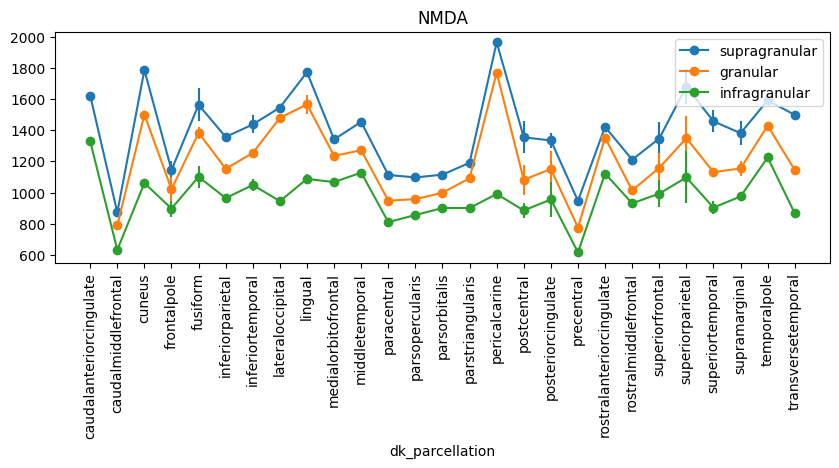

In [13]:
ax = nmda_mean.plot(marker='o', yerr=nmda_std, figsize=[10,3], title='NMDA')
ax.set_xticks(range(len(nmda_mean.index)))
ax.set_xticklabels(nmda_mean.index, rotation=90);

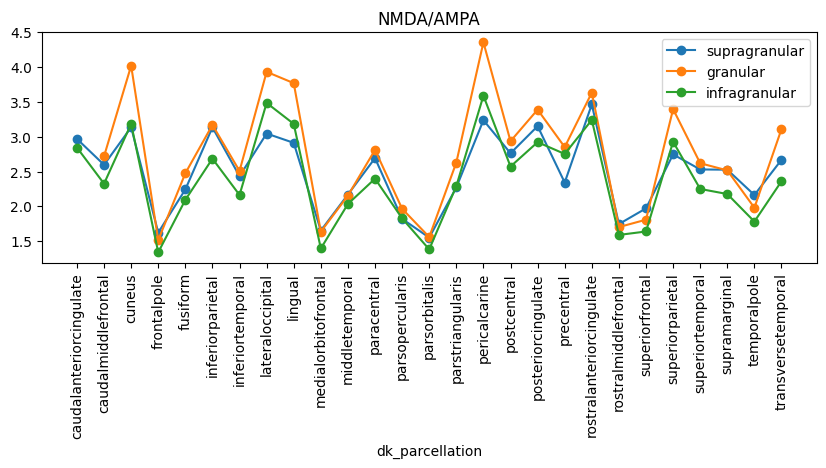

In [14]:
ratio = nmda_mean/ampa_mean
ax = ratio.plot(marker='o', figsize=[10,3], title='NMDA/AMPA')
ax.set_xticks(range(len(ratio.index)))
ax.set_xticklabels(ratio.index, rotation=90);